In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df_1 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3src_16x16/test-dataset_3src_16x16/50x12P5_bs5000_34c2da80_2t_train-dataset_3src_16x16_test-dataset_3src_16x16_vars.parquet')
df_2 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3src_16x16/test-dataset_3src_16x16/50x12P5_bs5000_34c2da80_20t_train-dataset_3src_16x16_test-dataset_3src_16x16_vars.parquet')
df_3 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3src_16x16/test-dataset_3src_16x16/50x12P5_bs5000_34c2da80_2t_train-dataset_3src_16x16_test-dataset_3src_16x16_nonquantized_vars.parquet')
df_4 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3src_16x16/test-dataset_3src_16x16/50x12P5_bs5000_34c2da80_20t_train-dataset_3src_16x16_test-dataset_3src_16x16_nonquantized_vars.parquet')

#### Scaling Lists for Different Pixel Pitches (dataset_2s):
* 100x25x100 um:  [150.0, 37.5, 10.0, 1.22]
* 50x25x100 um:   [75.0, 37.5, 10.0, 1.22]
* 50x20x100 um:   [75.0, 30.0, 10.0, 1.22]
* 50x15x100 um:   [75.0, 22.5, 10.0, 1.22]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 1.22]
* 50x10x100 um:   [75.0, 15.0, 10.0, 1.22]

#### Scaling Lists for Different Pixel Pitches (dataset_3sr):
* 100x25x100 um:  [150.0, 37.5, 10.0, 10.0]
* 50x25x100 um:   [75.0, 37.5, 10.0, 10.0]
* 50x20x100 um:   [75.0, 30.0, 10.0, 10.0]
* 50x15x100 um:   [75.0, 22.5, 10.0, 10.0]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 10.0]
* 50x10x100 um:   [75.0, 15.0, 10.0, 10.0]

#### Scaling Lists for Different Pixel Pitches (dataset_3sr, |cot$\beta$| $\leq$ 1.5):
* 100x25x100 um:  [150.0, 37.5, 10.0, 1.5]
* 50x25x100 um:   [75.0, 37.5, 10.0, 1.5]
* 50x20x100 um:   [75.0, 30.0, 10.0, 1.5]
* 50x15x100 um:   [75.0, 22.5, 10.0, 1.5]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 1.5]
* 50x10x100 um:   [75.0, 15.0, 10.0, 1.5]

### $x$ Residuals

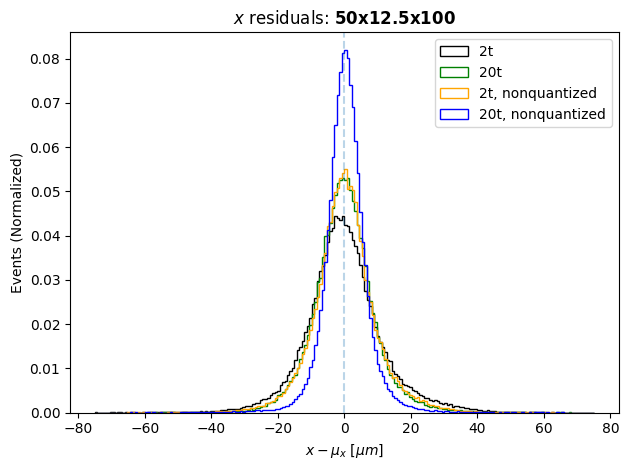

In [15]:
fig, ax = plt.subplots()
bins = np.linspace(-75,75,201)

ax.hist((df_1['residualsX'])*99.17029747384261, bins=bins, histtype='step', color='black', label='2t', density=True)
ax.hist((df_2['residualsX'])*99.17029747384261, bins=bins, histtype='step', color='green', label='20t', density=True)
ax.hist((df_3['residualsX'])*99.17029747384261, bins=bins, histtype='step', color='orange', label='2t, nonquantized', density=True)
ax.hist((df_4['residualsX'])*99.17029747384261, bins=bins, histtype='step', color='blue', label='20t, nonquantized', density=True)


ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$x$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel('$x - \mu_{x}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/xresiduals_vs_nonquantized.png', dpi=300)
fig.show()

### $y$ Residuals

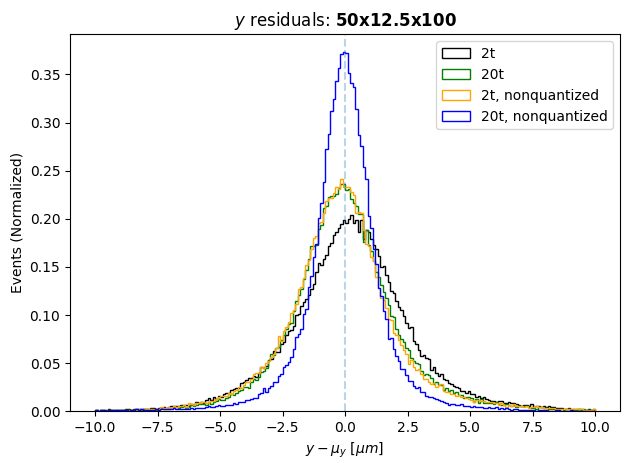

In [14]:
fig, ax = plt.subplots()
bins = np.linspace(-10,10,201)

ax.hist((df_1['residualsY'])*24.793709225460578, bins=bins, histtype='step', color='black', label='2t', density=True)
ax.hist((df_2['residualsY'])*24.793709225460578, bins=bins, histtype='step', color='green', label='20t', density=True)
ax.hist((df_3['residualsY'])*24.793709225460578, bins=bins, histtype='step', color='orange', label='2t, nonquantized', density=True)
ax.hist((df_4['residualsY'])*24.793709225460578, bins=bins, histtype='step', color='blue', label='20t, nonquantized', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$y$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel('$y - \mu_{y}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/yresiduals_vs_nonquantized.png', dpi=300)
fig.show()

### cot $\alpha$ Residuals

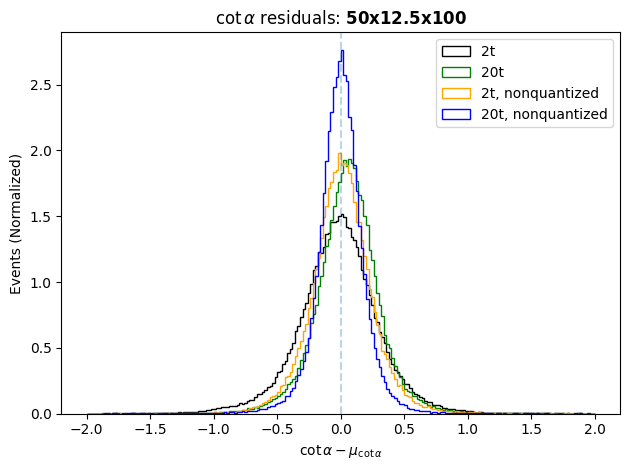

In [16]:
fig, ax = plt.subplots()
bins = np.linspace(-2,2,201)

ax.hist((df_1['residualsA'])*6.532457642551941, bins=bins, histtype='step', color='black', label='2t', density=True)
ax.hist((df_2['residualsA'])*6.532457642551941, bins=bins, histtype='step', color='green', label='20t', density=True)
ax.hist((df_3['residualsA'])*6.532457642551941, bins=bins, histtype='step', color='orange', label='2t, nonquantized', density=True)
ax.hist((df_4['residualsA'])*6.532457642551941, bins=bins, histtype='step', color='blue', label='20t, nonquantized', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$\cot \alpha$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel(r'$\cot \alpha - \mu_{\cot \alpha}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/cotAresiduals_vs_nonquantized.png', dpi=300)
fig.show()

### cot $\beta$ Residuals

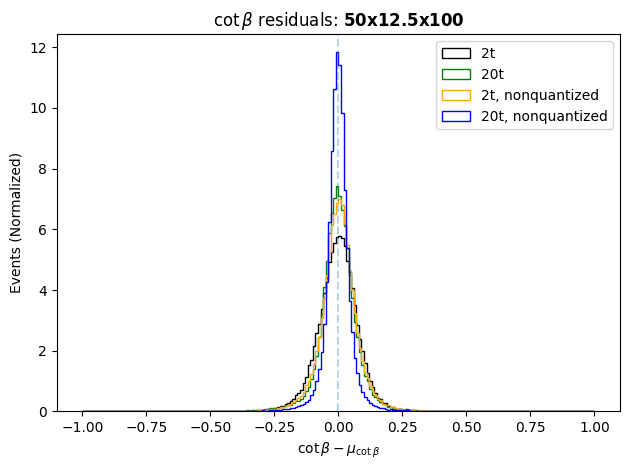

In [17]:
fig, ax = plt.subplots()
bins = np.linspace(-1,1,201)

ax.hist((df_1['residualsB'])*1.8903121495447106, bins=bins, histtype='step', color='black', label='2t', density=True)
ax.hist((df_2['residualsB'])*1.8903121495447106, bins=bins, histtype='step', color='green', label='20t', density=True)
ax.hist((df_3['residualsB'])*1.8903121495447106, bins=bins, histtype='step', color='orange', label='2t, nonquantized', density=True)
ax.hist((df_4['residualsB'])*1.8903121495447106, bins=bins, histtype='step', color='blue', label='20t, nonquantized', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$\cot \beta$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel(r'$\cot \beta - \mu_{\cot \beta}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/cotBresiduals_vs_nonquantized.png', dpi=300)
fig.show()

### Residuals + Uncertainties Comparison

In [7]:
def residual_plot(ax, thisdf, var1, var2, name, color, label=None, scaling=1.0, alpha=0.2):
    
    nbins = 50
    
    var1_scaled = thisdf[var1] * scaling
    var2_scaled = thisdf[var2] * scaling
    residual_scaled = var1_scaled - var2_scaled
    
    xmin = np.min(var1_scaled)
    xmax = np.max(var1_scaled)
    
    step = 1.0*(xmax-xmin)/nbins
    
    x = sns.regplot(x=var1_scaled, y=residual_scaled, x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = residual_scaled
    print(var1)
    
    means = []
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
        downbar += [means[i] - np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

pi = 3.14159265359

def inverse_cot(cota):
    a = np.arctan(1.0/cota)
    a[np.where(a<0)] = a[np.where(a<0)] + pi
    return a    

def residual_plot_deg(ax, thisdf, var1, var2, name, color, label=None, scaling=1.0, alpha=0.2):
    # positions
    if 'cot' not in var1:
        residual_plot(ax, thisdf, var1, var2, name, scaling=scaling)
        return

    thisdf['angle'] = inverse_cot(thisdf[var2].values * scaling)*180/pi
    
    thisdf['angleup'] = abs(inverse_cot((thisdf[var2].values + thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angledown'] = abs(inverse_cot((thisdf[var2].values - thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angletrue'] = inverse_cot(thisdf[var1].values * scaling)*180/pi
        
    var1 = 'angletrue'
    var2 = 'angle'
    
    nbins = 50
    xmin = np.min(thisdf[var1])
    xmax = np.max(thisdf[var1])
    
    step = 1.0*(xmax-xmin)/nbins
        
    x = sns.regplot(x=thisdf[var1], y=(thisdf[var1]-thisdf[var2]), x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = (thisdf[var1]-thisdf[var2])
    print(var1)
    
    means = []    
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['angleup'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        downbar += [means[i] - np.mean(thisdf['angledown'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
    #ax.scatter(x=np.linspace(xmin,xmax,nbins),y=means)
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

### Residuals vs Truth 

xtrue
xtrue
xtrue
xtrue
ytrue
ytrue
ytrue
ytrue


/tmp/ipykernel_13832/4132177454.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue


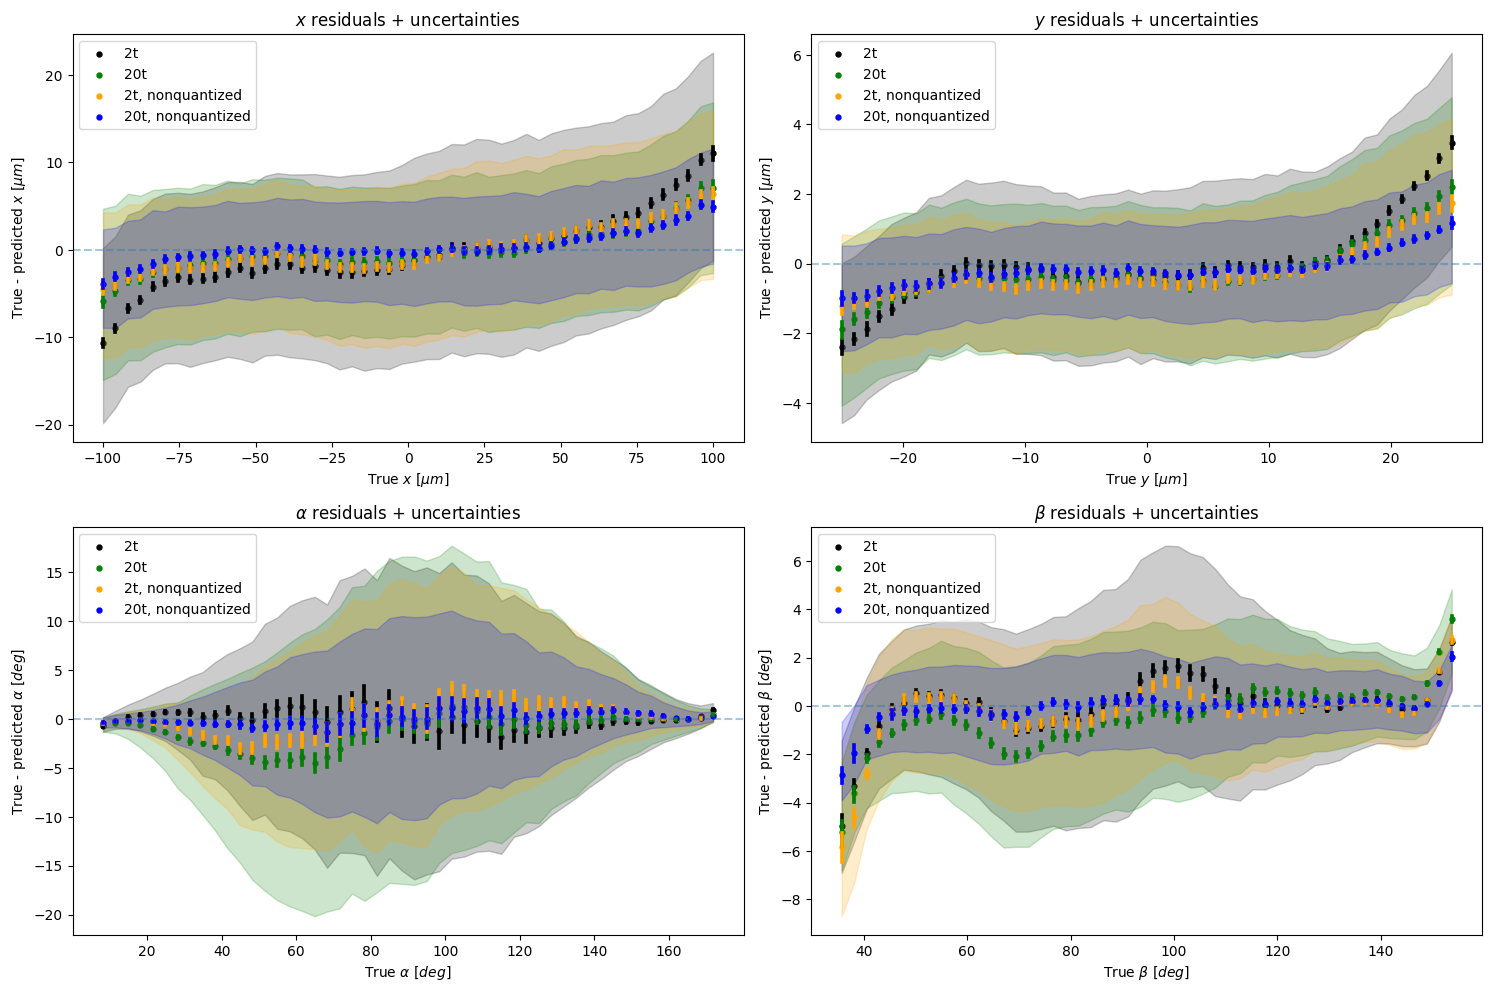

In [18]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

residual_plot(ax[0,0], df_1, 'xtrue', 'x', label='2t', name=r'$x$ $[\mu m]$', color='black', scaling=99.17029747384261)
residual_plot(ax[0,0], df_2, 'xtrue', 'x', label='20t', name=r'$x$ $[\mu m]$', color='green', scaling=99.17029747384261)
residual_plot(ax[0,0], df_3, 'xtrue', 'x', label='2t, nonquantized', name=r'$x$ $[\mu m]$', color='orange', scaling=99.17029747384261)
residual_plot(ax[0,0], df_4, 'xtrue', 'x', label='20t, nonquantized', name=r'$x$ $[\mu m]$', color='blue', scaling=99.17029747384261)
ax[0,0].axhline(alpha=0.4, ls='dashed')
ax[0,0].set_title(r'$x$ residuals + uncertainties')
ax[0,0].legend(loc='upper left')

residual_plot(ax[0,1], df_1, 'ytrue', 'y', label='2t', name=r'$y$ $[\mu m]$', color='black', scaling=24.793709225460578)
residual_plot(ax[0,1], df_2, 'ytrue', 'y', label='20t', name=r'$y$ $[\mu m]$', color='green', scaling=24.793709225460578)
residual_plot(ax[0,1], df_3, 'ytrue', 'y', label='2t, nonquantized', name=r'$y$ $[\mu m]$', color='orange', scaling=24.793709225460578)
residual_plot(ax[0,1], df_4, 'ytrue', 'y', label='20t, nonquantized', name=r'$y$ $[\mu m]$', color='blue', scaling=24.793709225460578)
ax[0,1].axhline(alpha=0.4, ls='dashed')
ax[0,1].set_title(r'$y$ residuals + uncertainties')
ax[0,1].legend(loc='upper left')

residual_plot_deg(ax[1,0], df_1, 'cotAtrue', 'cotA', label='2t', name=r'$\alpha$ $[deg]$', color='black', scaling=6.532457642551941)
residual_plot_deg(ax[1,0], df_2, 'cotAtrue', 'cotA', label='20t', name=r'$\alpha$ $[deg]$', color='green', scaling=6.532457642551941)
residual_plot_deg(ax[1,0], df_3, 'cotAtrue', 'cotA', label='2t, nonquantized', name=r'$\alpha$ $[deg]$', color='orange', scaling=6.532457642551941)
residual_plot_deg(ax[1,0], df_4, 'cotAtrue', 'cotA', label='20t, nonquantized', name=r'$\alpha$ $[deg]$', color='blue', scaling=6.532457642551941)
ax[1,0].axhline(alpha=0.4, ls='dashed')
ax[1,0].set_title(r'$\alpha$ residuals + uncertainties')
ax[1,0].legend(loc='upper left')

residual_plot_deg(ax[1,1], df_1, 'cotBtrue', 'cotB', label='2t', name=r'$\beta$ $[deg]$', color='black', scaling=1.8903121495447106)
residual_plot_deg(ax[1,1], df_2, 'cotBtrue', 'cotB', label='20t', name=r'$\beta$ $[deg]$', color='green', scaling=1.8903121495447106)
residual_plot_deg(ax[1,1], df_3, 'cotBtrue', 'cotB', label='2t, nonquantized', name=r'$\beta$ $[deg]$', color='orange', scaling=1.8903121495447106)
residual_plot_deg(ax[1,1], df_4, 'cotBtrue', 'cotB', label='20t, nonquantized', name=r'$\beta$ $[deg]$', color='blue', scaling=1.8903121495447106)
ax[1,1].axhline(alpha=0.4, ls='dashed')
ax[1,1].set_title(r'$\beta$ residuals + uncertainties')
ax[1,1].legend(loc='upper left')

fig.tight_layout(pad=1.0)
#fig.legend(title='Sensor Geometry [$\mu m^3$]', loc='upper center', ncol=7, bbox_to_anchor=(0.5, 1.03))
fig.savefig('plots/dataset_3src_16x16_plots/performance/residuals_vs_truth_vs_nonquantized.png',  bbox_inches='tight', dpi=300)
fig.show()

In [9]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def pull_plot(ax, data, name, color, label=None,):
    
    h = ax.hist(data, bins=np.linspace(-20,20,100), histtype='step', label=label, color=color)
    ax.legend(loc='upper right')
    ax.set_xlabel(name)
    ax.set_yscale('log')
    ax.axvline(alpha=0.3, ls='dashed')

    ydata = h[0]
    xdata = h[1][:-1]+5/49

    pars, cov = curve_fit(gauss,xdata,ydata,maxfev=5000)

    xbins = np.linspace(-20,20,100)
    ax.plot(xbins,gauss(xbins,pars[0],pars[1],pars[2]),color='black')
    ax.set_ylim(0.5,1000000)

    #print('Mean',pars[1])
    #print('Sigma',par?s[2])
    
    ax.text(-7,11000,"$\mu$="+str(round(pars[1],2)))
    ax.text(3,11000,"$\sigma$="+str(round(abs(pars[2]),2)))

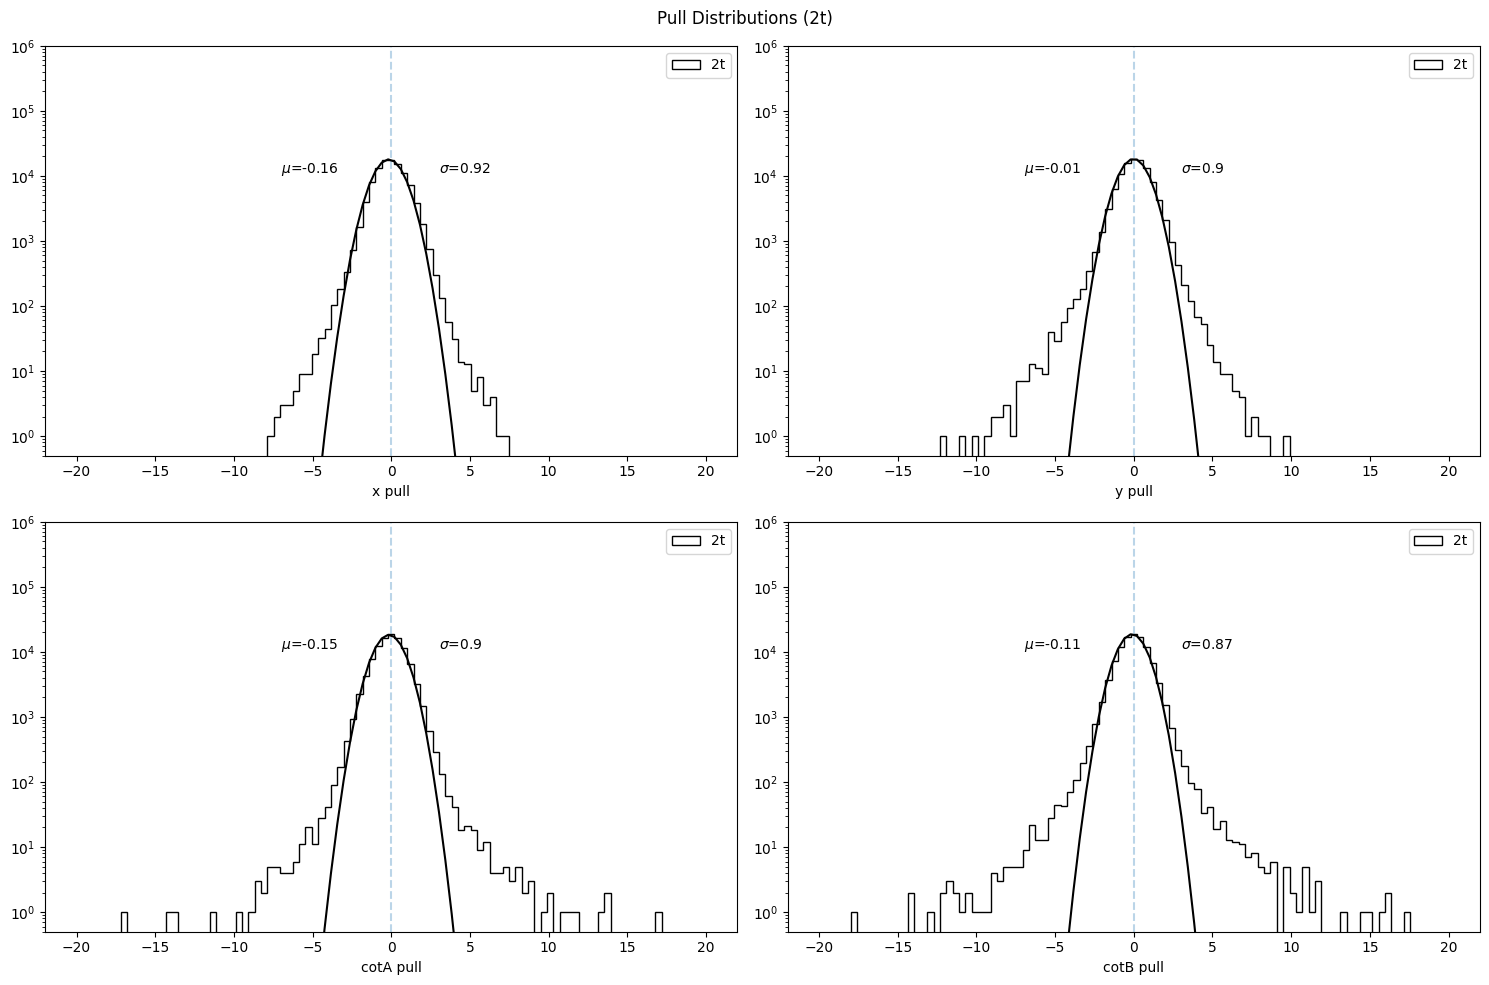

In [10]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
pull_plot(axes[0,0], df_1['pullx'], label='2t', name='x pull', color='black')
pull_plot(axes[0,1], df_1['pully'], label='2t', name='y pull', color='black')
pull_plot(axes[1,0], df_1['pullcotA'], label='2t', name='cotA pull', color='black')
pull_plot(axes[1,1], df_1['pullcotB'], label='2t', name='cotB pull', color='black')

fig.suptitle(r'Pull Distributions (2t)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/pulls_2t.png', dpi=300)

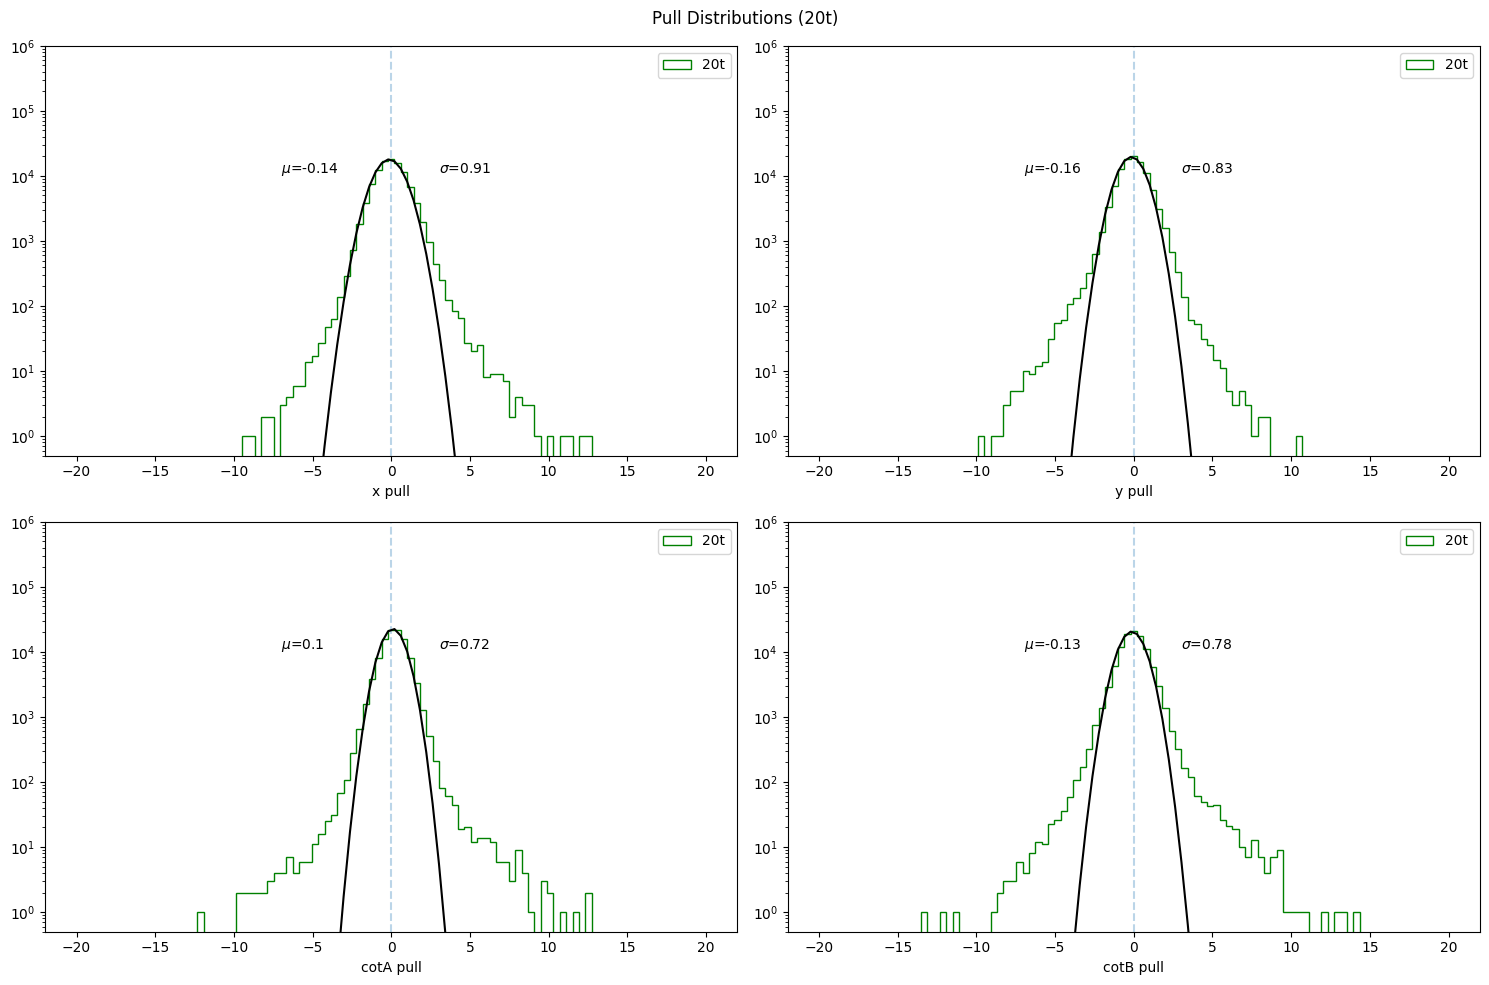

In [11]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
pull_plot(axes[0,0], df_2['pullx'], label='20t', name='x pull', color='green')
pull_plot(axes[0,1], df_2['pully'], label='20t', name='y pull', color='green')
pull_plot(axes[1,0], df_2['pullcotA'], label='20t', name='cotA pull', color='green')
pull_plot(axes[1,1], df_2['pullcotB'], label='20t', name='cotB pull', color='green')

fig.suptitle(r'Pull Distributions (20t)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/pulls_20t.png', dpi=300)

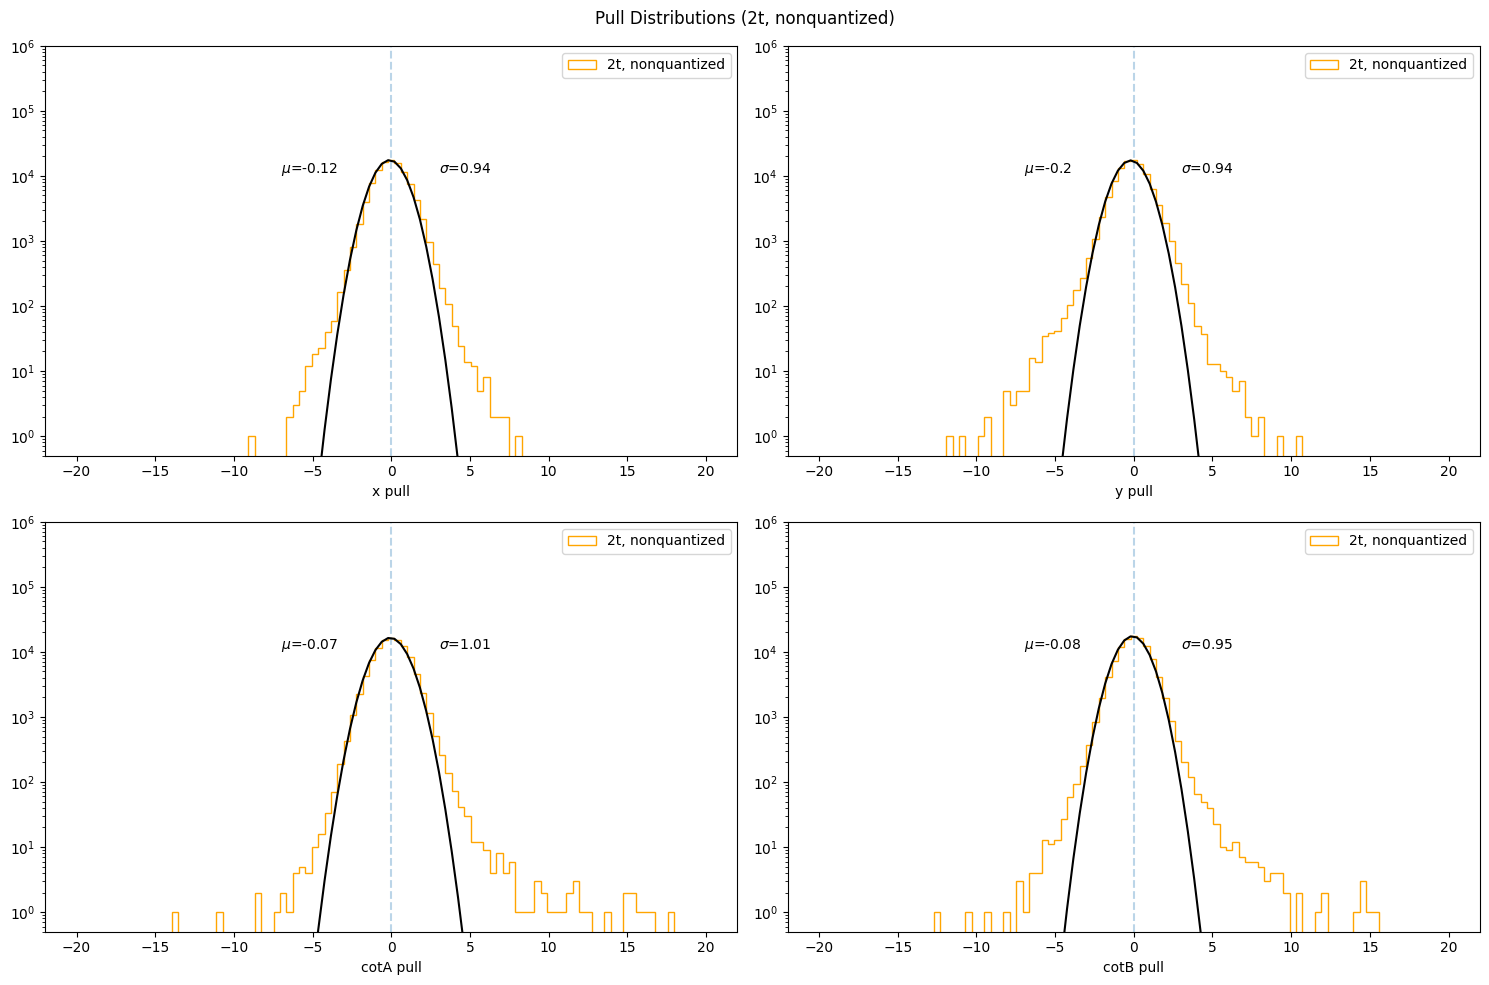

In [12]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
pull_plot(axes[0,0], df_3['pullx'], label='2t, nonquantized', name='x pull', color='orange')
pull_plot(axes[0,1], df_3['pully'], label='2t, nonquantized', name='y pull', color='orange')
pull_plot(axes[1,0], df_3['pullcotA'], label='2t, nonquantized', name='cotA pull', color='orange')
pull_plot(axes[1,1], df_3['pullcotB'], label='2t, nonquantized', name='cotB pull', color='orange')

fig.suptitle(r'Pull Distributions (2t, nonquantized)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/pulls_2t_nonquantized.png', dpi=300)

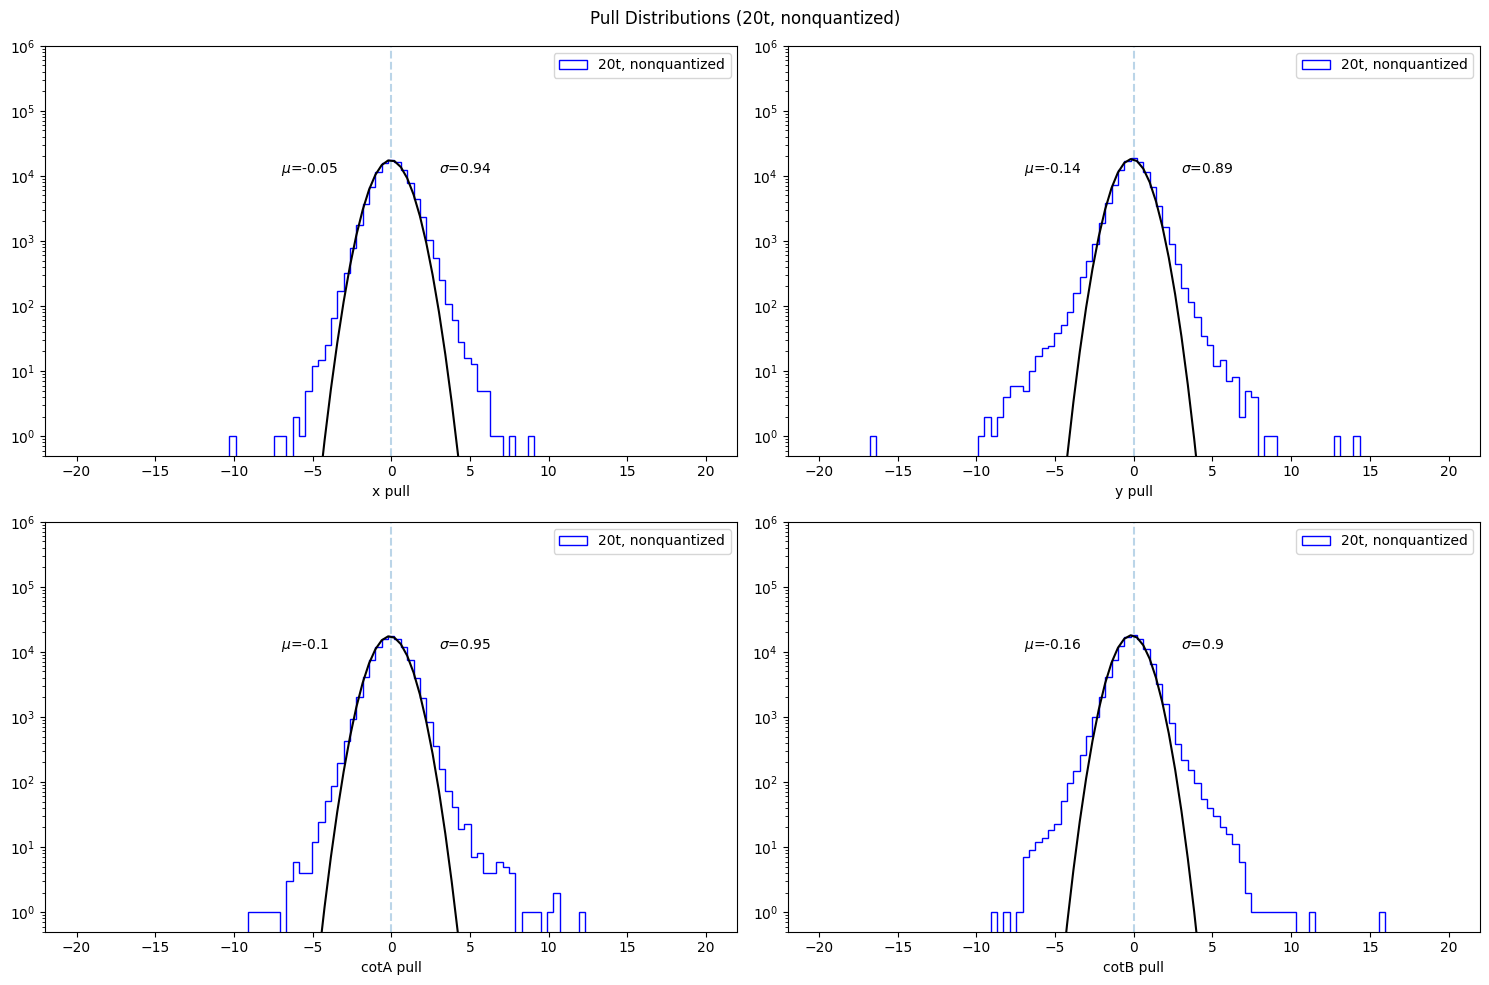

In [13]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
pull_plot(axes[0,0], df_4['pullx'], label='20t, nonquantized', name='x pull', color='blue')
pull_plot(axes[0,1], df_4['pully'], label='20t, nonquantized', name='y pull', color='blue')
pull_plot(axes[1,0], df_4['pullcotA'], label='20t, nonquantized', name='cotA pull', color='blue')
pull_plot(axes[1,1], df_4['pullcotB'], label='20t, nonquantized', name='cotB pull', color='blue')

fig.suptitle(r'Pull Distributions (20t, nonquantized)')
fig.tight_layout()
fig.savefig('plots/dataset_3src_16x16_plots/performance/pulls_20t_nonquantized.png', dpi=300)